# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import optimizers

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv("/home/sanjana/Documents/DSML/Data sets/DJIA Stock/all_stocks_2006-01-01_to_2018-01-01.csv",index_col='Date', parse_dates=['Date'])

# Data Exploration

In [3]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [4]:
df.shape

(93612, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


The columns 'Open', 'High' and 'Low' have null values. 

In [6]:
df['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [7]:
name_count = df.groupby(['Name']).count()
print(name_count['Volume'].unique())

[3019 3020]


Some stocks have 3019 entries while some have 3020 entries in the duration 2006-01-01 to 2018-01-01

Now we create a dcitionary with key as the name of the stock and the value is the dataframe for the stock. The training set contains data from 2006-01-01 to 2018-01-01 while the test set contains data from 

In [8]:
stock = list(df['Name'].unique())
df_ = {}
for i in stock:
    df_[i] = df.loc[df['Name']==i]

# Prepare Dataset

The training set is price of stocks from 2006 to 2015 and the test set is from 2016 to 2018.

In [9]:
def splitDataset(data, date, col):
    return data.loc[:date,col], data.loc[date:,col]

In [10]:
df_new_ = {}
for i in stock:
    df_new_[i] = {}
    df_new_[i]['Train'], df_new_[i]['Test'] = splitDataset(df_[i], '2016', 'High')

# Visualization

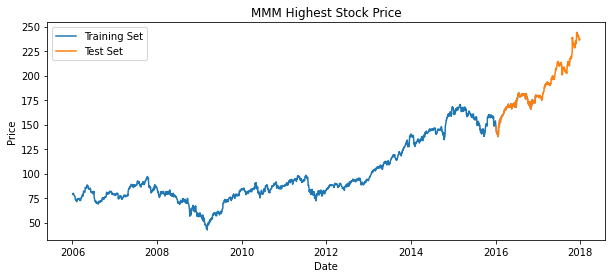

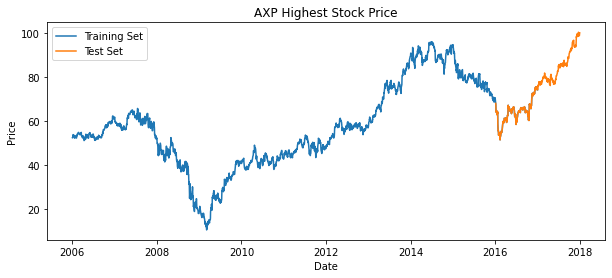

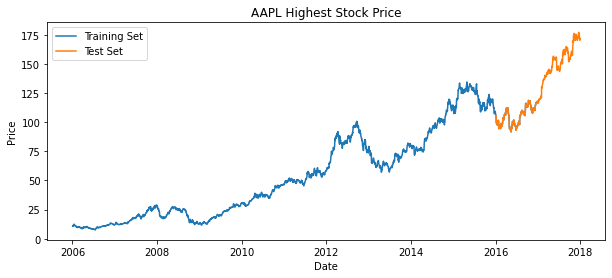

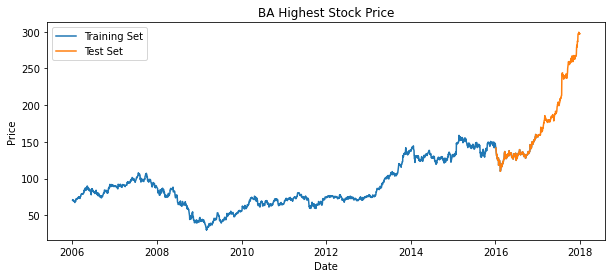

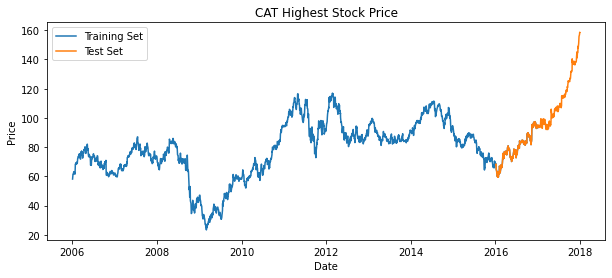

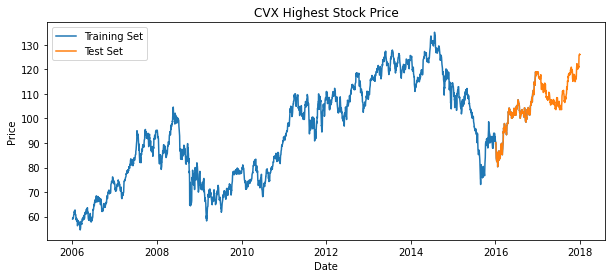

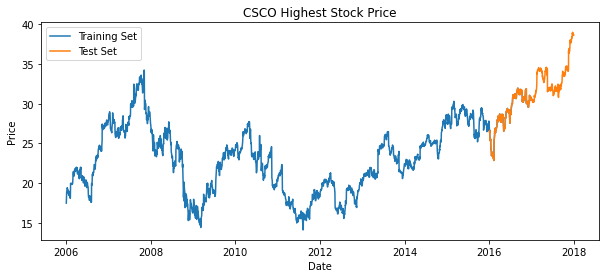

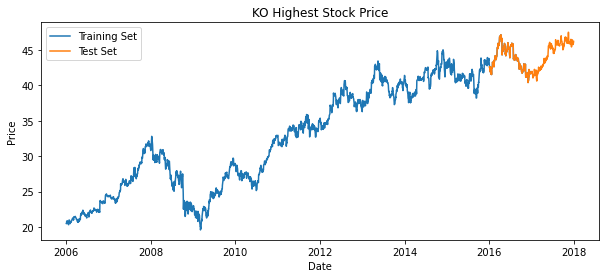

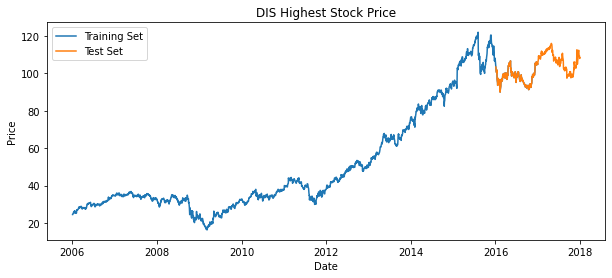

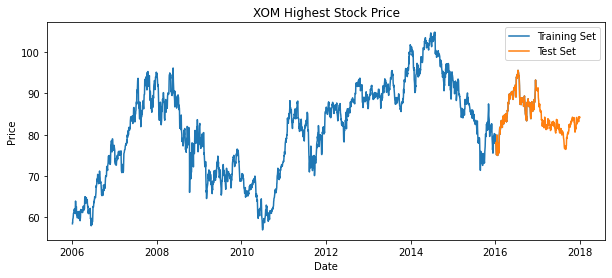

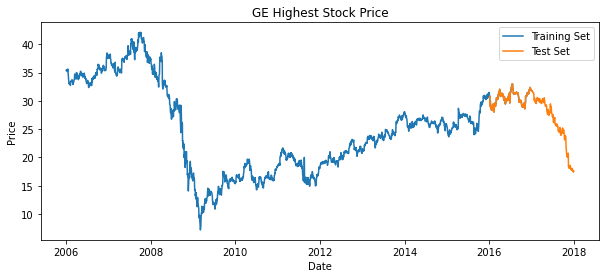

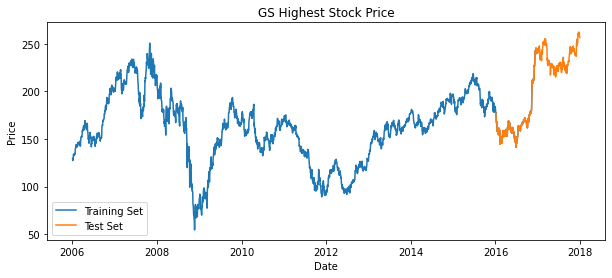

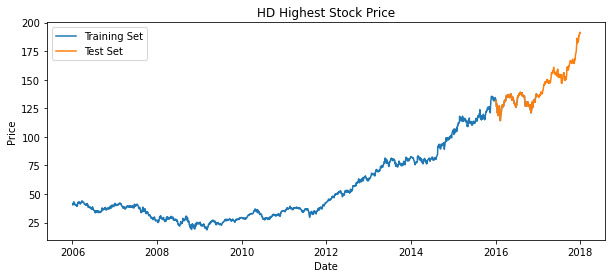

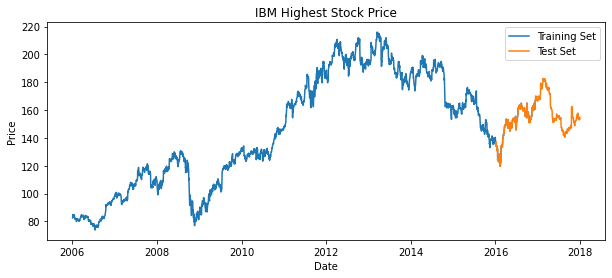

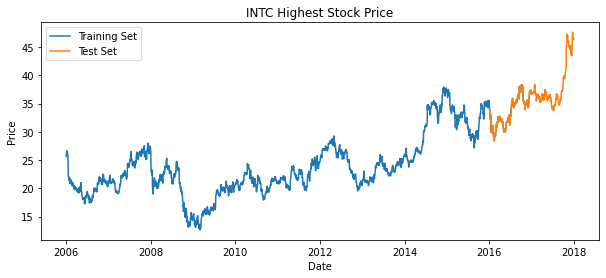

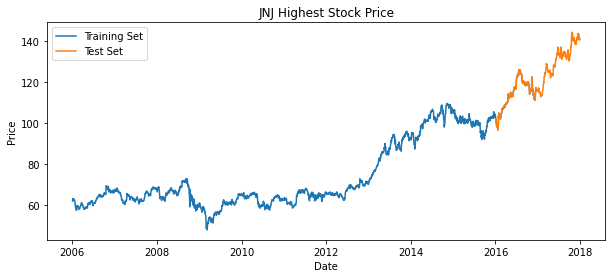

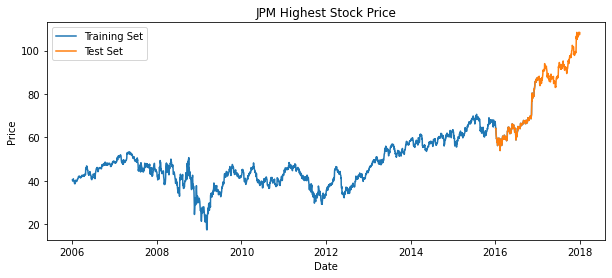

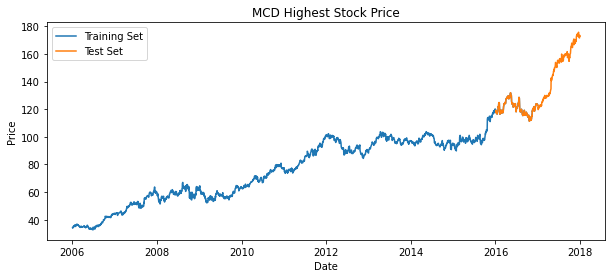

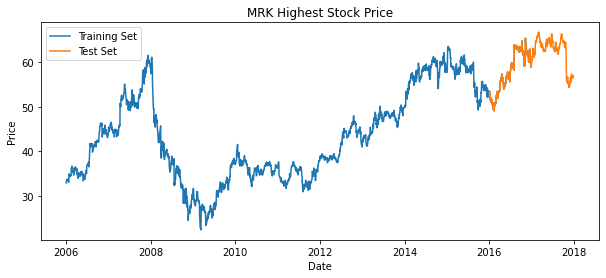

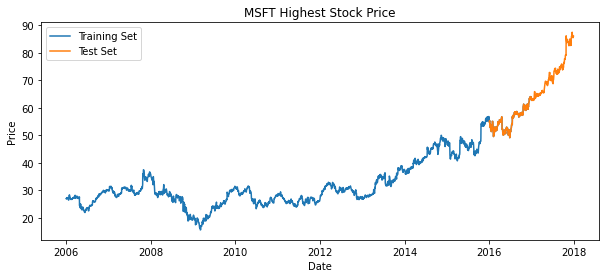

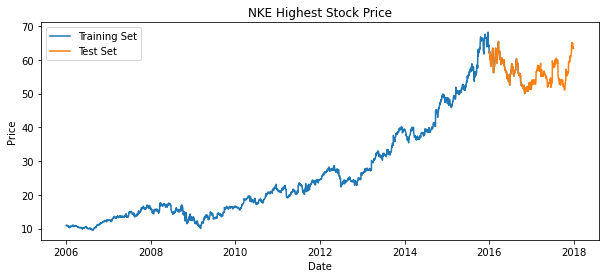

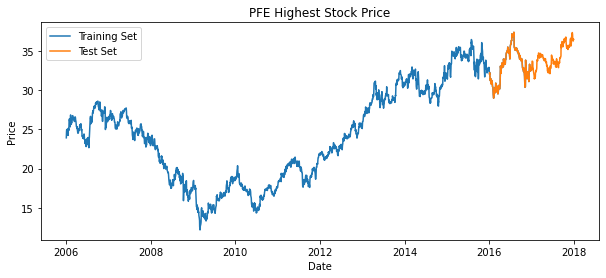

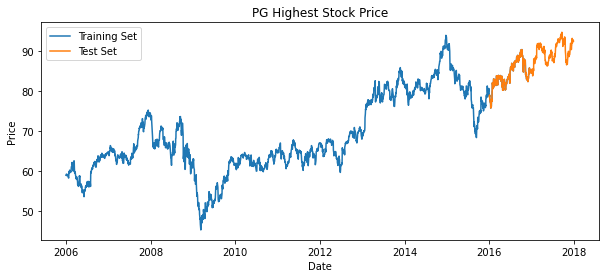

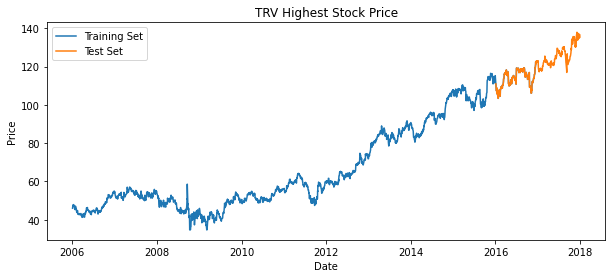

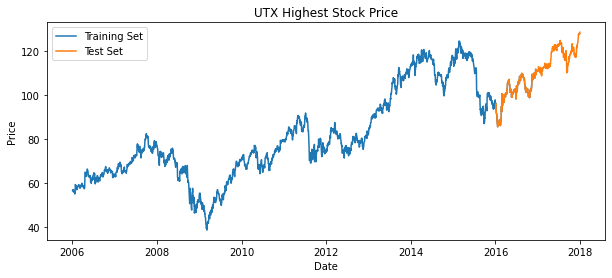

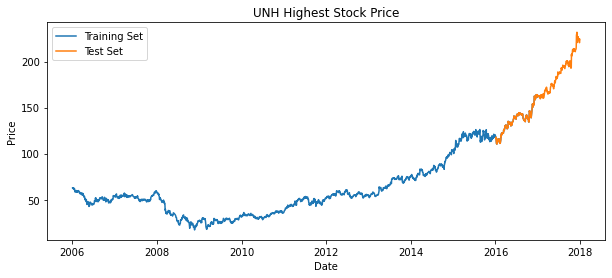

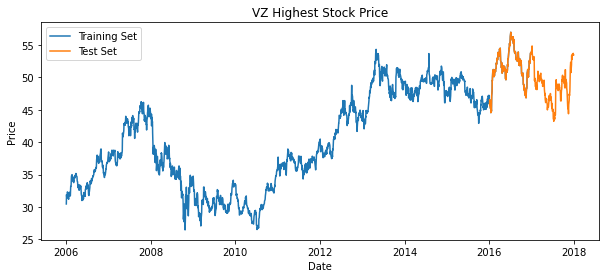

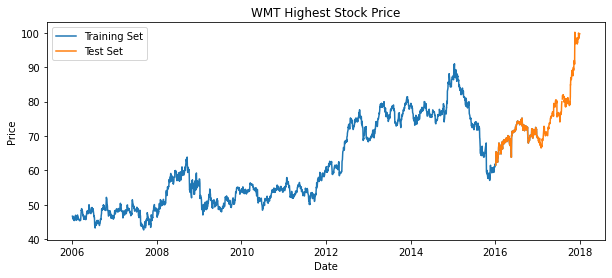

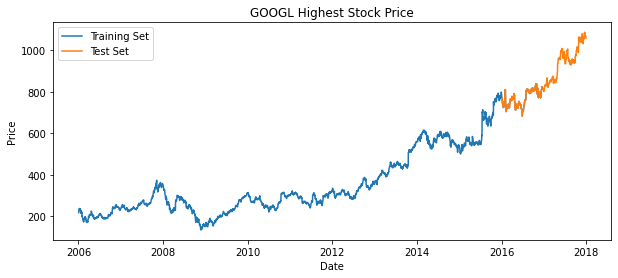

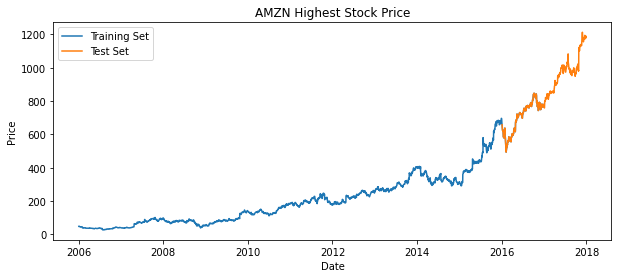

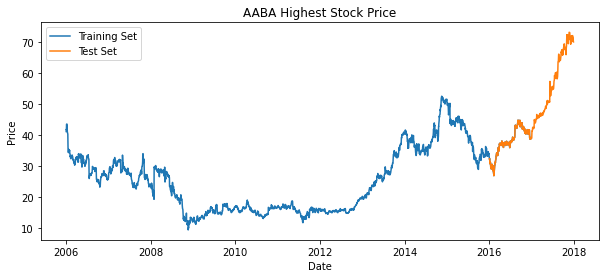

In [11]:
for i in stock:
    plt.figure(figsize=(10,4))
    plt.plot(df_new_[i]['Train'])
    plt.plot(df_new_[i]['Test'])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Highest Stock Price")


# Feature Engineering

In [12]:
for i in stock:
    df_new_[i]['Train'] = pd.DataFrame(df_new_[i]['Train']).dropna()
    df_new_[i]['Test'] = pd.DataFrame(df_new_[i]['Test']).dropna()

In [13]:
sc= {}
for i in stock:
    df_new_[i]['Train'] = df_new_[i]['Train'].values.reshape(-1,1)
    df_new_[i]['Test'] = df_new_[i]['Test'].values.reshape(-1,1)
    scaler =  MinMaxScaler()
    df_new_[i]['Train'] = scaler.fit_transform(df_new_[i]['Train'])
    df_new_[i]['Test'] = scaler.transform(df_new_[i]['Test'])
    sc[i] = scaler

In [14]:
train_count = 10000000000
test_count = 100000000
for i in stock:
    print(i, df_new_[i]['Train'].shape, df_new_[i]['Test'].shape)
    train_count = min(train_count, df_new_[i]['Train'].shape[0])
    test_count = min(test_count, df_new_[i]['Test'].shape[0])

MMM (2769, 1) (503, 1)
AXP (2769, 1) (503, 1)
AAPL (2768, 1) (503, 1)
BA (2769, 1) (502, 1)
CAT (2769, 1) (502, 1)
CVX (2769, 1) (503, 1)
CSCO (2768, 1) (503, 1)
KO (2769, 1) (502, 1)
DIS (2768, 1) (503, 1)
XOM (2769, 1) (503, 1)
GE (2769, 1) (503, 1)
GS (2769, 1) (503, 1)
HD (2769, 1) (503, 1)
IBM (2769, 1) (503, 1)
INTC (2768, 1) (503, 1)
JNJ (2769, 1) (503, 1)
JPM (2769, 1) (503, 1)
MCD (2769, 1) (502, 1)
MRK (2768, 1) (502, 1)
MSFT (2768, 1) (503, 1)
NKE (2769, 1) (503, 1)
PFE (2769, 1) (502, 1)
PG (2769, 1) (503, 1)
TRV (2769, 1) (502, 1)
UTX (2769, 1) (503, 1)
UNH (2769, 1) (502, 1)
VZ (2769, 1) (503, 1)
WMT (2769, 1) (502, 1)
GOOGL (2768, 1) (503, 1)
AMZN (2768, 1) (503, 1)
AABA (2768, 1) (503, 1)


Since LSTMs store previous states, we store 60 previous timesteps for each element in the training set. 

In [15]:
time_steps = 75

In [16]:
train = {}
for i in stock:
    train[i] = {}
    X_train = []
    y_train = []
    for j in range(time_steps, train_count):
        X_train.append(df_new_[i]['Train'][j-time_steps:j,0])
        y_train.append(df_new_[i]['Train'][j,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    train[i]['X_train'] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    train[i]['y_train'] = y_train
    print(i, train[i]['X_train'].shape, train[i]['y_train'].shape)

MMM (2693, 75, 1) (2693,)
AXP (2693, 75, 1) (2693,)
AAPL (2693, 75, 1) (2693,)
BA (2693, 75, 1) (2693,)
CAT (2693, 75, 1) (2693,)
CVX (2693, 75, 1) (2693,)
CSCO (2693, 75, 1) (2693,)
KO (2693, 75, 1) (2693,)
DIS (2693, 75, 1) (2693,)
XOM (2693, 75, 1) (2693,)
GE (2693, 75, 1) (2693,)
GS (2693, 75, 1) (2693,)
HD (2693, 75, 1) (2693,)
IBM (2693, 75, 1) (2693,)
INTC (2693, 75, 1) (2693,)
JNJ (2693, 75, 1) (2693,)
JPM (2693, 75, 1) (2693,)
MCD (2693, 75, 1) (2693,)
MRK (2693, 75, 1) (2693,)
MSFT (2693, 75, 1) (2693,)
NKE (2693, 75, 1) (2693,)
PFE (2693, 75, 1) (2693,)
PG (2693, 75, 1) (2693,)
TRV (2693, 75, 1) (2693,)
UTX (2693, 75, 1) (2693,)
UNH (2693, 75, 1) (2693,)
VZ (2693, 75, 1) (2693,)
WMT (2693, 75, 1) (2693,)
GOOGL (2693, 75, 1) (2693,)
AMZN (2693, 75, 1) (2693,)
AABA (2693, 75, 1) (2693,)


In [17]:
test = {}
for i in stock:
    test[i] = {}
    X_test = []
    y_test = []
    for j in range(time_steps, test_count):
        X_test.append(df_new_[i]['Test'][j-time_steps:j,0])
        y_test.append(df_new_[i]['Test'][j,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    test[i]['X_test'] = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    test[i]['y_test'] = y_test
    print(i, test[i]['X_test'].shape, test[i]['y_test'].shape)

MMM (427, 75, 1) (427,)
AXP (427, 75, 1) (427,)
AAPL (427, 75, 1) (427,)
BA (427, 75, 1) (427,)
CAT (427, 75, 1) (427,)
CVX (427, 75, 1) (427,)
CSCO (427, 75, 1) (427,)
KO (427, 75, 1) (427,)
DIS (427, 75, 1) (427,)
XOM (427, 75, 1) (427,)
GE (427, 75, 1) (427,)
GS (427, 75, 1) (427,)
HD (427, 75, 1) (427,)
IBM (427, 75, 1) (427,)
INTC (427, 75, 1) (427,)
JNJ (427, 75, 1) (427,)
JPM (427, 75, 1) (427,)
MCD (427, 75, 1) (427,)
MRK (427, 75, 1) (427,)
MSFT (427, 75, 1) (427,)
NKE (427, 75, 1) (427,)
PFE (427, 75, 1) (427,)
PG (427, 75, 1) (427,)
TRV (427, 75, 1) (427,)
UTX (427, 75, 1) (427,)
UNH (427, 75, 1) (427,)
VZ (427, 75, 1) (427,)
WMT (427, 75, 1) (427,)
GOOGL (427, 75, 1) (427,)
AMZN (427, 75, 1) (427,)
AABA (427, 75, 1) (427,)


# Build RNN using LSTM 

In [18]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.4))

model.add(Dense(units=1))

In [19]:
optimizer = optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

for i in stock:
    print("Fitting to", i)
    model.fit(train[i]['X_train'], train[i]['y_train'], epochs=10, batch_size=150)

Fitting to MMM
Epoch 1/10
18/18 [==============================] - 3s 190ms/step - loss: 0.0454
Epoch 2/10
18/18 [==============================] - 3s 164ms/step - loss: 0.0113
Epoch 3/10
18/18 [==============================] - 3s 165ms/step - loss: 0.0062
Epoch 4/10
18/18 [==============================] - 3s 183ms/step - loss: 0.0059
Epoch 5/10
18/18 [==============================] - 3s 194ms/step - loss: 0.0056
Epoch 6/10
18/18 [==============================] - 3s 162ms/step - loss: 0.0055
Epoch 7/10
18/18 [==============================] - 4s 201ms/step - loss: 0.0053
Epoch 8/10
18/18 [==============================] - 3s 188ms/step - loss: 0.0050
Epoch 9/10
18/18 [==============================] - 3s 168ms/step - loss: 0.0048
Epoch 10/10
18/18 [==============================] - 3s 184ms/step - loss: 0.0049
Fitting to AXP
Epoch 1/10
18/18 [==============================] - 3s 173ms/step - loss: 0.0064
Epoch 2/10
18/18 [==============================] - 3s 185ms/step - loss: 0.00

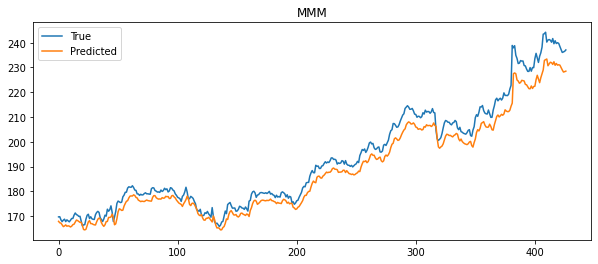

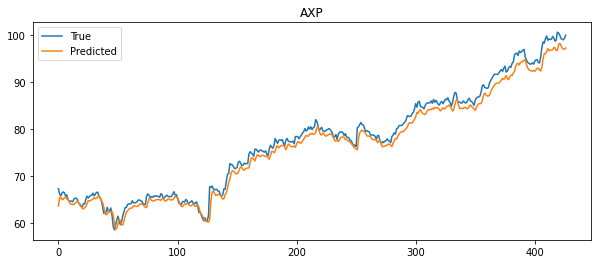

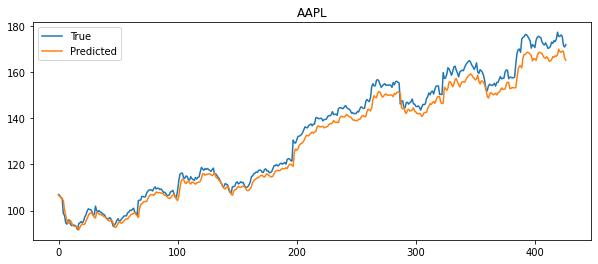

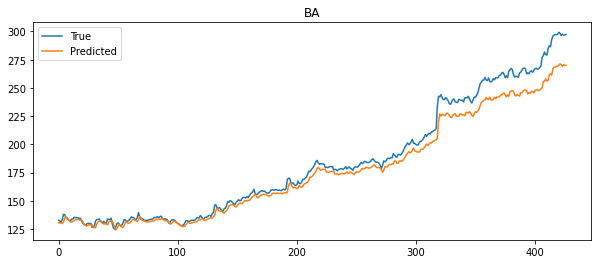

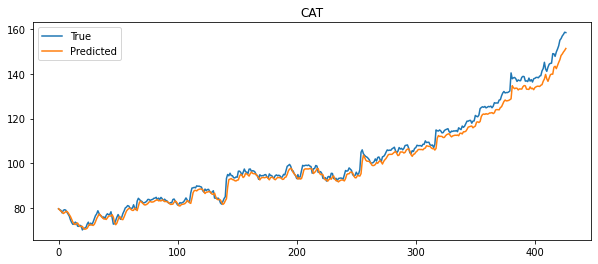

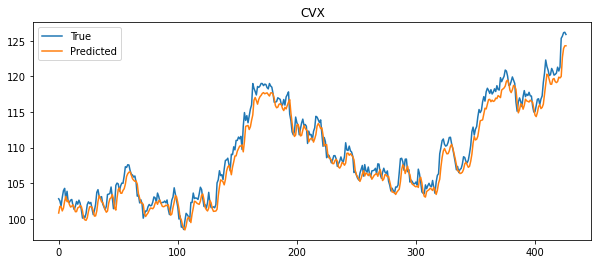

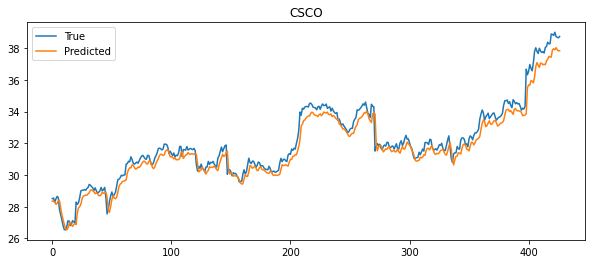

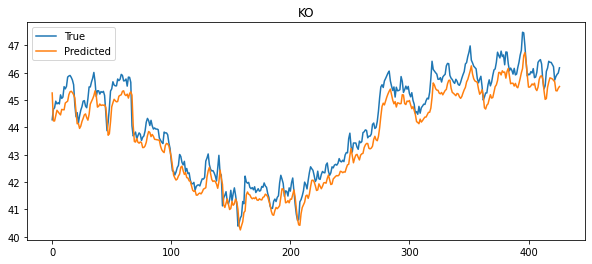

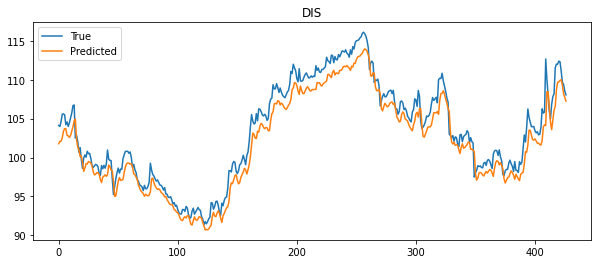

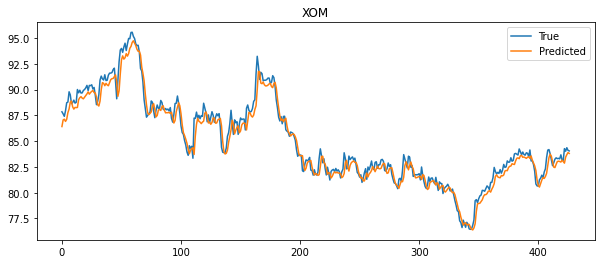

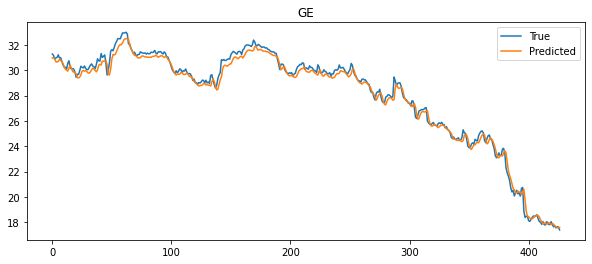

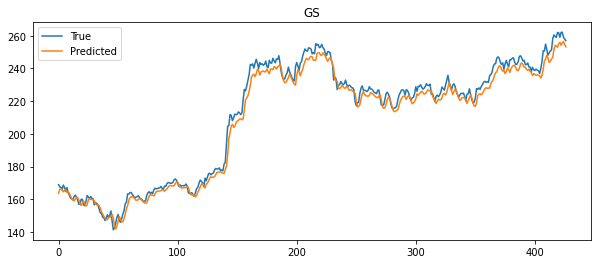

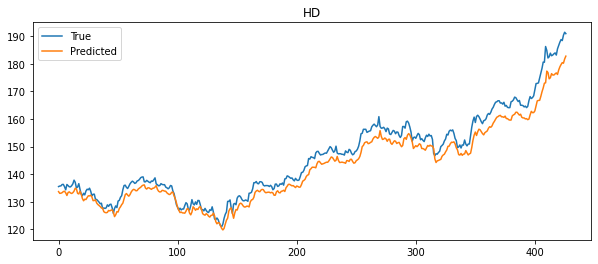

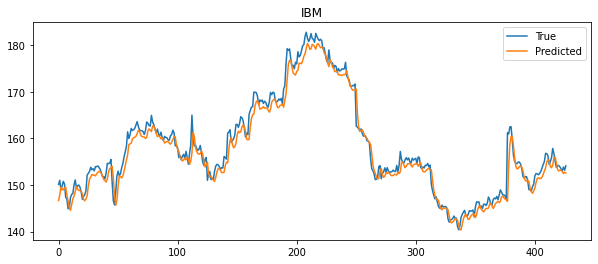

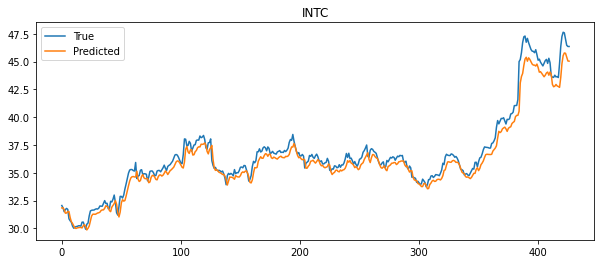

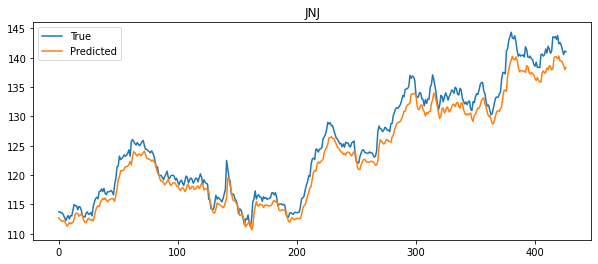

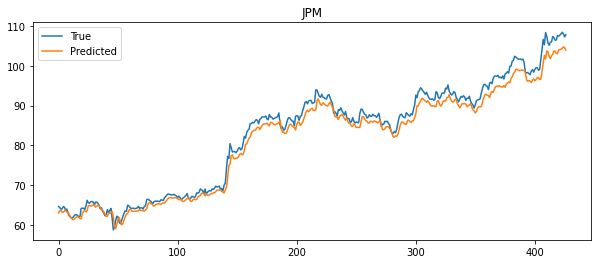

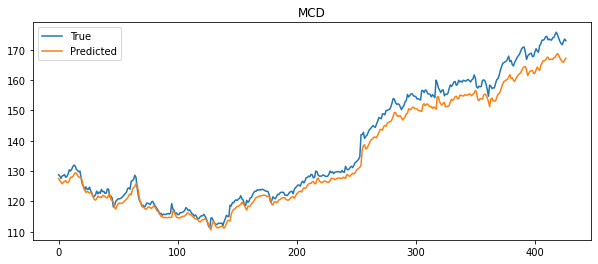

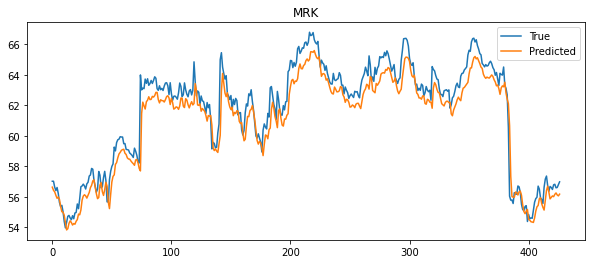

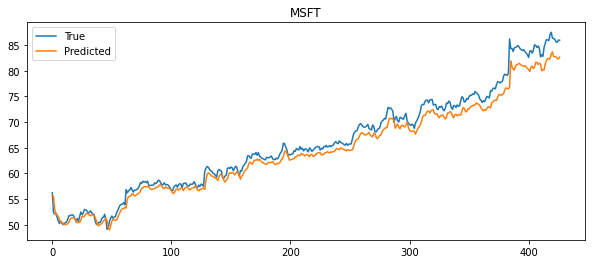

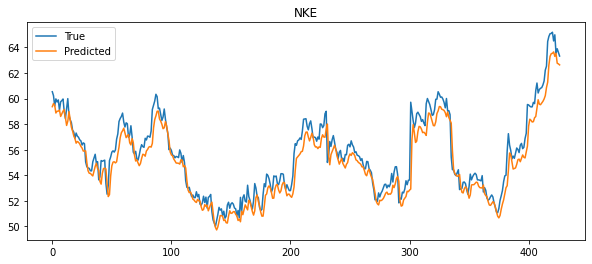

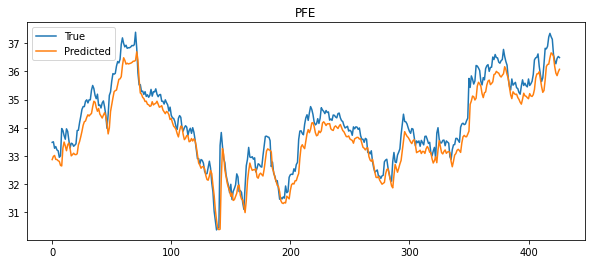

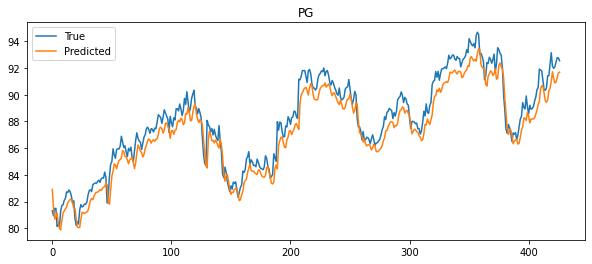

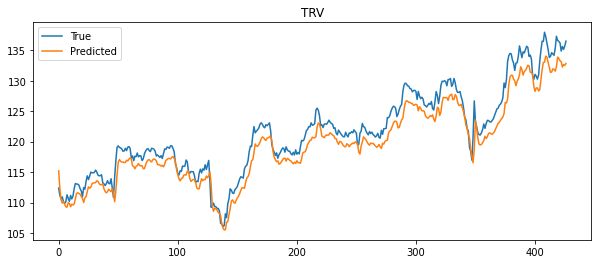

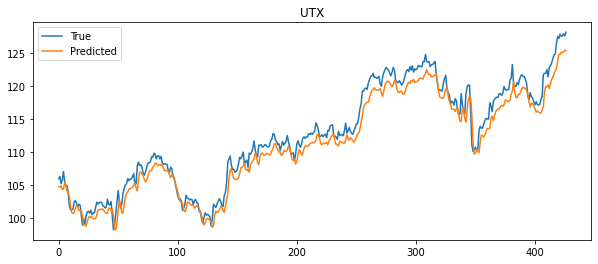

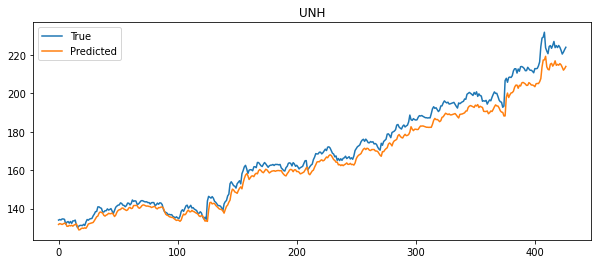

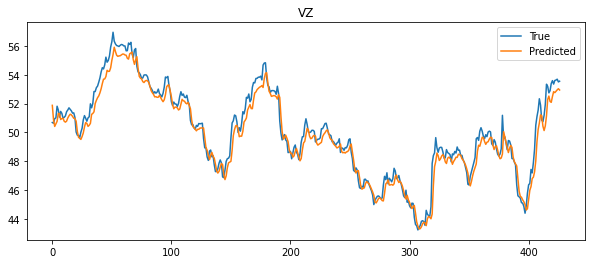

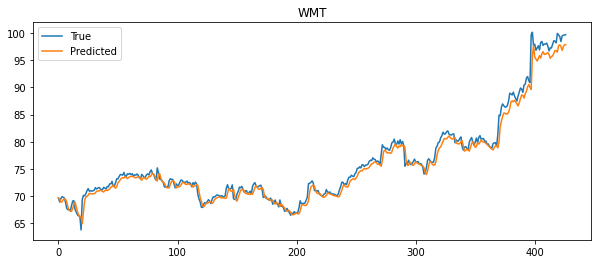

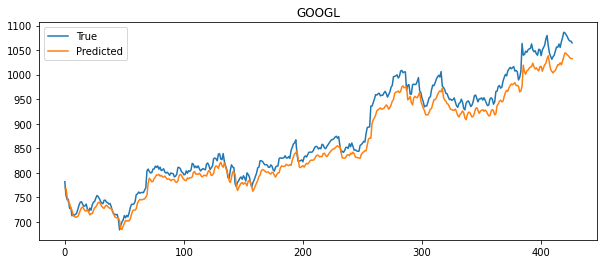

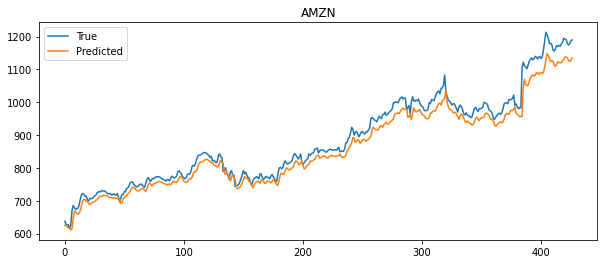

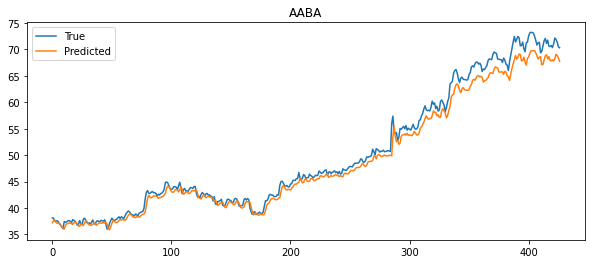

In [20]:
for i in stock:
    y_true = sc[i].inverse_transform(test[i]['y_test'].reshape(-1,1))
    predicted_stock_price = model.predict(test[i]['X_test'])
    y_pred = sc[i].inverse_transform(predicted_stock_price)
    
    plt.figure(figsize=(10,4))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(['True', 'Predicted'])
    plt.title(i)

The predicted values lie slightly below the true values.

In [21]:
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('Root mean square error = {}'.format(rmse))

Root mean square error = 1.6168603497885166
